In [37]:
# Import packages and modules
%cd ..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import src.markowitz as mk

/Users/joseartes


# Monte Carlo: An Introduction to its Applications in Financial Mathematics

### 1. Introduction

*Monte Carlo is a method whereby something deterministic (e.g., number pi) is estimated via random sampling.*

#### Example

Consider the integral $ \int_{2}^{5} x^2 e^{-x^3} \, dx $. This can clearly be solved as follows: $ \int_{2}^{5} x^2 e^{-x^3} \, dx = -\frac{1}{3} \int_{2}^{5} -3x^2 e^{-x^3} \, dx = \left[-\frac{1}{3} \cdot e^{-x^3}\right]_{2}^{5} $ = $ \left(-\frac{1}{3} \cdot e^{-5^3}\right) + \left(\frac{1}{3} \cdot e^{-2^3}\right) = -1.12 \cdot 10^{-4}$ However, things become trickier when asked to solve the integral $ \int_{2}^{5} e^{-x^3} \, dx $. This integral, in fact, lacks a closed-form solution, which means that we have to resort to numerical methods to solve it, such as Monte Carlo.

Before solving the integral, we will introduce the notion of the $ U\left(0,1\right)$ distribution i.e., the uniform distribution within the $\left(0,1\right)$ domain. This will lay the foundations of calculating the deterministic outcome of the above integral by sampling a sequence of random numbers that follow this distribution.

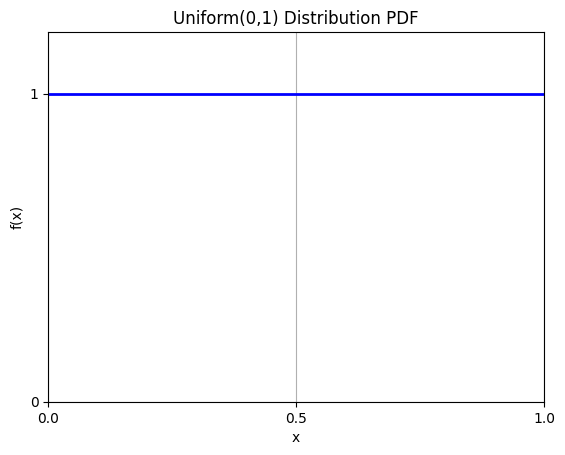

In [11]:
x = np.linspace(0, 1, 100)
y = np.ones_like(x)

plt.plot(x, y, color='blue', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Uniform(0,1) Distribution PDF')
plt.ylim(0, 1.2)
plt.xlim(0, 1)
plt.xticks([0, 0.5, 1])
plt.yticks([0, 1])
plt.grid(True)
plt.show()


The probability density function of the $ U\left(0,1\right)$ distribution is expressed as
$$
p(x) = \begin{cases}
1, & \text{if } 0 \leq x \leq 1 \\
0, & \text{otherwise}
\end{cases}
$$

This means that that its expected value can simply be expressed as $ E[X] = \int_{0}^{1} xp(x) \, dx  = \int_{0}^{1} x \, dx $. If we can therefore express the above integral in this form, we can sample a sufficiently large sequence of random numbers from the $ U\left(0,1\right)$ and take their average.

Firstly, we need to re-express $ \int_{2}^{5} e^{-x^3} \, dx $ such that the limits change from $2$ and $5$ to $0$ and $1$ respectively, and at the same time apply a suitable substitution for $x$. We can do this via $u=\frac{x-a}{b-a}$, which is very similar to the min-max feature scaling technique. Through the above equality we can see that $x=3u+2$ and hence that $\frac{du}{dx}=\frac{x}{b}\implies dx=3du$. Therefore, if we replace these identities in the integral we can see that $ \int_{2}^{5} e^{-x^3} \, dx = 3\int_{0}^{1} e^{-(3u+2)^3} \, du \approx 3\Sigma_{i=1}^n \frac{e^{-(3u_{i}+2)^3}}{n}$ when $n\rightarrow\infty$ - let's verify this below by sampling $25000$ random numbers from the $ U\left(0,1\right)$ distribution and compare against the actual result reached via the ```scipy.integrate``` module.

In [38]:
import scipy.integrate as integrate
import math
import random

# Define function
def mc_integral(n_sims):
    mc_fun = 0
    for i in range(n_sims):
        mc_fun += 3*math.e**(-(3*random.random() + 2)**3)
    return mc_fun / n_sims

# Solve via Scipy quad integration method
scipy_result = integrate.quad(lambda x: math.e**(-x**3), 2, 5)
print(f"Scipy Result: {scipy_result[0]}")
# Solve via Monte Carlo
print(f"Monte Carlo Result: {mc_integral(250000)}")

Scipy Result: 2.5997275372899832e-05
Monte Carlo Result: 2.6190757713788362e-05


We see that indeed both results converge and that Monte Carlo is proving to be successful for estimating the function. Below it can be seen that as we increase the number of simulations, the average of the function outputs converges towards the actual solution!

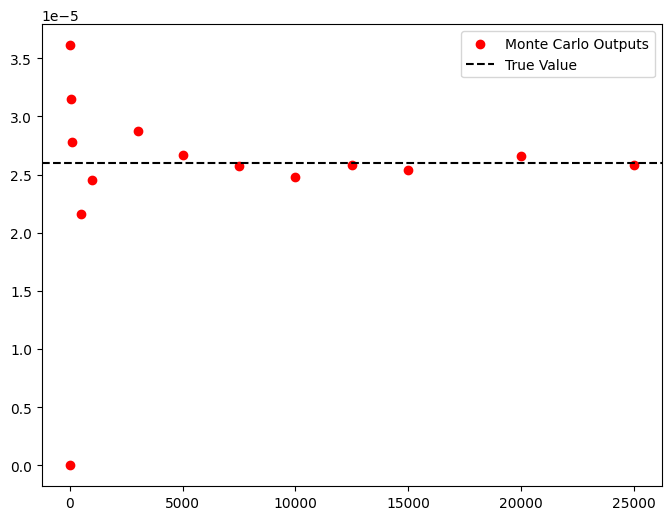

In [44]:
n_sims = [1,10,50,100,500,1000,3000,5000,7500,10000,12500,15000,20000,25000]
mc_results = [mc_integral(n) for n in n_sims]
plt.figure(figsize=(8,6))
plt.scatter(n_sims, mc_results, c="red", label="Monte Carlo Outputs")
plt.axhline(scipy_result[0], c="black", linestyle="--", label="True Value")
plt.legend()
plt.show()

### 2. Markowitz Portfolio Theory

Markowitz Portfolio Theory (also known as Modern Portfolio Theory) is a method that enables the selection of investments of a portfolio that maximises the returns with an acceptable level of risk. It assumes that all investors are risk-averse, meaning that if one has to choose between two investments with the same returns but different risk-levels, the one with the lowest risk would ultimately be selected. This portfolio is known as the maximum Sharpe ratio portfolio.

Let us assume we hold a portfolio in which we hold proportions $\vec{\pi}=\left(\pi_{1}, \pi_{2},...,\pi_{n}\right)$ for $n$ stocks with their respective average daily returns $\vec{\mu}=\left(\mu_{1}, \mu_{2},...,\mu_{n}\right)$. Additionally let us define the portfolio return as $\mu_{P}=\vec{\mu}\cdot\vec{\pi}^{T}$=\Sigma

In [30]:
df_raw = pd.read_csv("./stocks_raw.csv")
df_returns = pd.read_csv("./stocks_returns.csv", index_col="date")

In [31]:
df_raw.head()

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,split_factor,dividend,symbol,exchange,date
0,181.03,181.78,179.2600,180.95,61945900.0,181.78,179.2600,180.95,181.030,61996913.0,1.0,0.0,AAPL,XNAS,2023-06-02
1,334.25,337.50,332.5500,335.40,25864000.0,337.50,332.5500,335.40,334.247,25873769.0,1.0,0.0,MSFT,XNAS,2023-06-02
2,400.97,405.00,390.5800,393.27,48165500.0,405.00,390.5801,393.27,400.970,48273121.0,1.0,0.0,NVDA,XNAS,2023-06-02
3,210.15,217.25,209.7520,213.97,164398372.0,217.25,209.7520,213.97,210.150,164398372.0,1.0,0.0,TSLA,XNAS,2023-06-02
4,177.70,180.12,176.9306,180.09,65573428.0,180.12,176.9306,180.09,177.700,68901809.0,1.0,0.0,AAPL,XNAS,2023-06-01


In [32]:
df_returns

,AAPL,MSFT,NVDA,TSLA
date,,,,
2022-06-07,0.017433,0.013857,0.007425,0.002543
2022-06-08,-0.005056,-0.007699,-0.014798,0.012397
2022-06-09,-0.036618,-0.021002,-0.032704,-0.008971
2022-06-10,-0.039395,-0.045587,-0.061352,-0.031688
2022-06-13,-0.039037,-0.043338,-0.081404,-0.073670
...,...,...,...,...
2023-05-26,0.014006,0.021160,0.025116,0.046084
2023-05-30,0.010603,-0.005059,0.029475,0.040530
2023-05-31,-0.000282,-0.008551,-0.058442,0.013676


<Axes: >

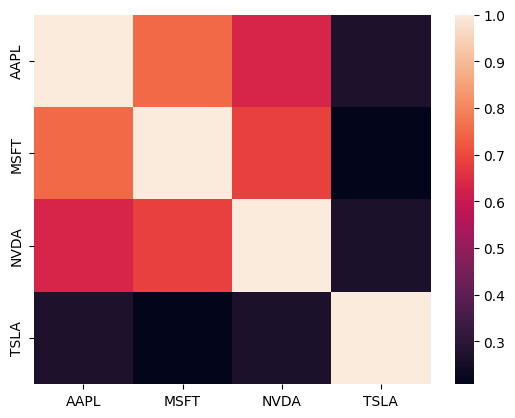

In [33]:
sns.heatmap(df_returns.corr())

<Axes: xlabel='date'>

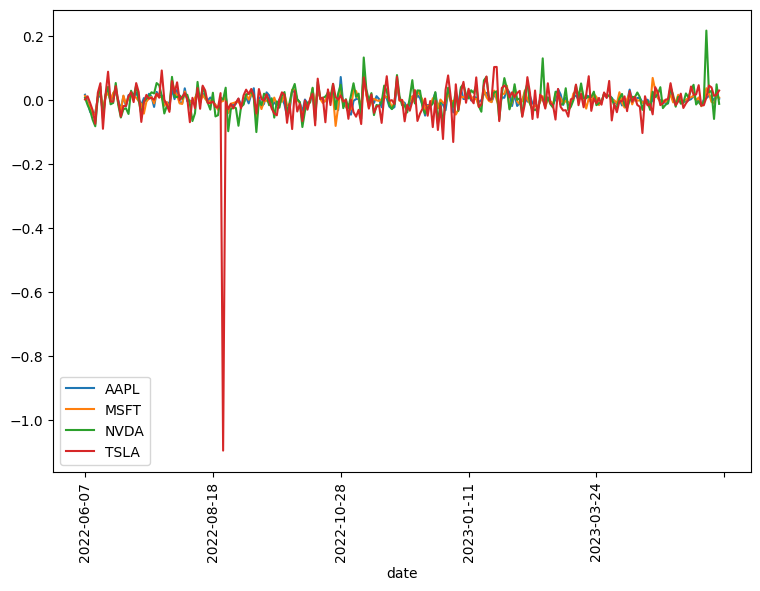

In [34]:
df_returns.plot(figsize=(9,6),rot=90)

In [35]:
mk = markowitz.Markowitz(df_returns)

In [49]:
df_sim = mk.simulate_portfolios(100000)
df_sim

,w0,w1,w2,w3,mu_p,sigma_p,sharpe
0,0.032720,0.570353,0.200595,0.196332,0.045266,0.427726,0.105830
1,0.610884,0.126810,0.229311,0.032995,0.291701,0.343708,0.848689
2,0.204926,0.355638,0.246098,0.193338,0.072038,0.429349,0.167785
3,0.049964,0.136930,0.805336,0.007769,0.634172,0.520927,1.217391
4,0.045886,0.219742,0.693898,0.040474,0.528609,0.488864,1.081300
...,...,...,...,...,...,...,...
99995,0.182258,0.468186,0.175910,0.173646,0.063930,0.402297,0.158913
99996,0.082644,0.036031,0.086840,0.794485,-0.878993,1.030149,-0.853268
99997,0.275022,0.126097,0.288341,0.310540,-0.075761,0.534597,-0.141715
99998,0.107081,0.239266,0.504262,0.149392,0.271466,0.468984,0.578839


In [50]:
df_sim[df_sim["sharpe"] == df_sim["sharpe"].max()]

,w0,w1,w2,w3,mu_p,sigma_p,sharpe
10117,0.006562,0.014548,0.978355,0.000535,0.735545,0.582587,1.262549


In [51]:
df_sim[df_sim["sigma_p"] == df_sim["sigma_p"].min()]

,w0,w1,w2,w3,mu_p,sigma_p,sharpe
90524,0.63985,0.354748,0.003217,0.002186,0.21763,0.299373,0.726955


In [52]:
df_min_var = mk.optimal_portfolio()

In [53]:
df_max_sharpe = mk.optimal_portfolio("max-sharpe")

In [54]:
df_min_var

,w0,w1,w2,w3,mu_p,sigma_p,sharpe
0,0.626396,0.373604,0.0,2.081668e-17,0.219212,0.298905,0.733384


In [55]:
df_max_sharpe

,w0,w1,w2,w3,mu_p,sigma_p,sharpe
0,1.006140e-16,0.0,1.0,0.0,0.747701,0.590573,1.26606


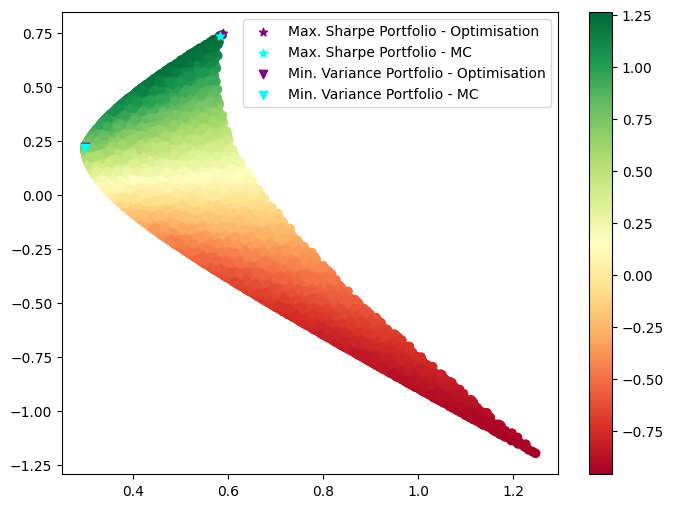

In [60]:
plt.figure(figsize=(8,6))
fig = plt.scatter(x=df_sim["sigma_p"],
            y=df_sim["mu_p"],
            c=df_sim["sharpe"],
            cmap="RdYlGn")
plt.scatter(x=df_max_sharpe["sigma_p"],
            y=df_max_sharpe["mu_p"],
            marker="*",
            c="purple",
            label="Max. Sharpe Portfolio - Optimisation")
plt.scatter(x=df_sim[df_sim["sharpe"] == df_sim["sharpe"].max()]["sigma_p"],
            y=df_sim[df_sim["sharpe"] == df_sim["sharpe"].max()]["mu_p"],
            marker="*",
            c="cyan",
            label="Max. Sharpe Portfolio - MC")
plt.scatter(x=df_min_var["sigma_p"],
            y=df_min_var["mu_p"],
            marker="v",
            c="purple",
            label="Min. Variance Portfolio - Optimisation")
plt.scatter(x=df_sim[df_sim["sigma_p"] == df_sim["sigma_p"].min()]["sigma_p"],
            y=df_sim[df_sim["sigma_p"] == df_sim["sigma_p"].min()]["mu_p"],
            marker="v",
            c="cyan",
            label="Min. Variance Portfolio - MC")
plt.colorbar(fig)
plt.legend()
plt.show()